In [7]:
import pandas as pd
import pandas as pd

# Load the Excel file
excel_file = 'Ecom_Churn_cleaned.xlsx'  # Replace with your actual file path
df = pd.read_excel(excel_file)

# Save as CSV
csv_file = 'clean_churn_data.csv'  # Desired output CSV file path
df.to_csv(csv_file, index=False)


In [8]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4,1,3,6,2,0,3,3,2,2,2,9,1,11,1.0,1.0,5,159.93
1,1,0,1,1,8,4,1,3,4,3,3,2,7,1,15,0.0,1.0,0,120.90
2,1,0,1,1,30,2,1,2,4,3,3,2,6,1,14,0.0,1.0,3,120.28
3,1,0,1,3,15,2,1,2,4,2,5,2,8,0,23,0.0,1.0,3,134.07
4,1,0,1,1,12,1,1,4,3,3,5,2,3,0,11,1.0,1.0,3,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150,0,10,0,1,30,1,1,3,2,2,1,1,6,0,18,1.0,2.0,4,150.71
5151,0,13,1,1,13,1,1,3,5,0,5,1,6,0,16,1.0,2.0,4,224.91
5152,0,1,1,1,11,2,1,3,2,2,4,1,3,1,21,1.0,2.0,4,186.42
5153,0,23,0,3,9,1,1,4,5,2,4,1,4,0,15,2.0,2.0,9,178.90


In [71]:
pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 9.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 7.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [73]:
# 1. Data Preparation
def prepare_data(df, test_size=0.2):
    X = df.drop('Churn', axis=1)
    y = df['Churn']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)
    
    # Convert to PyTorch tensors
    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)
    y_train = torch.FloatTensor(y_train.values)
    y_test = torch.FloatTensor(y_test.values)
    
    return X_train, X_test, y_train, y_test, scaler

In [74]:

# 2. Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim=16):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim)
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [75]:

# 3. Train Autoencoder
def train_autoencoder(autoencoder, X_train, X_test, epochs=50, batch_size=32):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
    
    train_loader = DataLoader(TensorDataset(X_train, X_train), batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(TensorDataset(X_test, X_test), batch_size=batch_size)
    
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        autoencoder.train()
        train_loss = 0
        for batch_X, _ in train_loader:
            optimizer.zero_grad()
            outputs = autoencoder(batch_X)
            loss = criterion(outputs, batch_X)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        autoencoder.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_X, _ in test_loader:
                outputs = autoencoder(batch_X)
                val_loss += criterion(outputs, batch_X).item()
        
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(test_loader))
        
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')
    
    return train_losses, val_losses

In [76]:

# 4. Generate Embeddings
def generate_embeddings(autoencoder, X):
    autoencoder.eval()
    with torch.no_grad():
        return autoencoder.encoder(X).numpy()

In [77]:

# 5. Visualizations
def plot_loss(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Autoencoder Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

def plot_embeddings(embeddings, labels):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)
    plt.title('2D Visualization of Autoencoder Embeddings')
    plt.xlabel('First Embedding Dimension')
    plt.ylabel('Second Embedding Dimension')
    plt.show()

In [78]:
# 6. Churn Prediction Model
class ChurnModel(nn.Module):
    def __init__(self, input_dim):
        super(ChurnModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.layers(x)

In [79]:
# 7. Train and Evaluate Churn Model
def train_and_evaluate_churn_model(model, X_train, y_train, X_test, y_test, epochs=50, batch_size=32):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_loader = DataLoader(TensorDataset(X_train, y_train.unsqueeze(1)), batch_size=batch_size, shuffle=True)
    
    for epoch in range(epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        y_pred_classes = (y_pred > 0.5).float()
        y_pred_proba = y_pred.squeeze().numpy()
    
    print(classification_report(y_test.numpy(), y_pred_classes.numpy()))
    print(f"ROC AUC Score: {roc_auc_score(y_test.numpy(), y_pred_proba):.4f}")

Epoch [1/50], Train Loss: 0.8617, Val Loss: 0.6407
Epoch [2/50], Train Loss: 0.5134, Val Loss: 0.4219
Epoch [3/50], Train Loss: 0.3636, Val Loss: 0.3225
Epoch [4/50], Train Loss: 0.2730, Val Loss: 0.2359
Epoch [5/50], Train Loss: 0.1933, Val Loss: 0.1686
Epoch [6/50], Train Loss: 0.1537, Val Loss: 0.1475
Epoch [7/50], Train Loss: 0.1365, Val Loss: 0.1297
Epoch [8/50], Train Loss: 0.1181, Val Loss: 0.1080
Epoch [9/50], Train Loss: 0.0995, Val Loss: 0.0913
Epoch [10/50], Train Loss: 0.0894, Val Loss: 0.0865
Epoch [11/50], Train Loss: 0.0832, Val Loss: 0.0766
Epoch [12/50], Train Loss: 0.0752, Val Loss: 0.0681
Epoch [13/50], Train Loss: 0.0681, Val Loss: 0.0624
Epoch [14/50], Train Loss: 0.0612, Val Loss: 0.0593
Epoch [15/50], Train Loss: 0.0571, Val Loss: 0.0544
Epoch [16/50], Train Loss: 0.0545, Val Loss: 0.0538
Epoch [17/50], Train Loss: 0.0539, Val Loss: 0.0513
Epoch [18/50], Train Loss: 0.0525, Val Loss: 0.0508
Epoch [19/50], Train Loss: 0.0510, Val Loss: 0.0501
Epoch [20/50], Train 

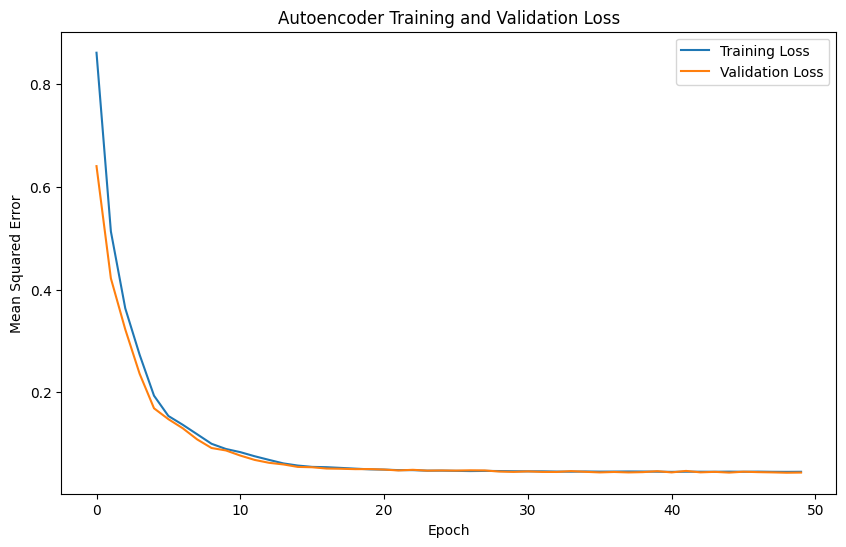

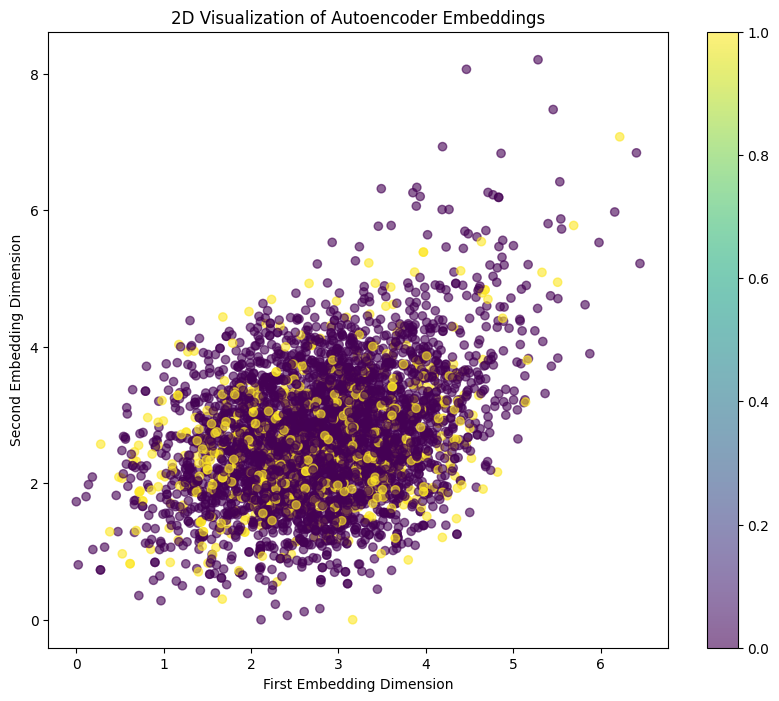

Epoch [10/50], Loss: 0.2105
Epoch [20/50], Loss: 0.2896
Epoch [30/50], Loss: 0.4954
Epoch [40/50], Loss: 0.3817
Epoch [50/50], Loss: 0.5251
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       857
         1.0       0.81      0.33      0.47       174

    accuracy                           0.87      1031
   macro avg       0.84      0.66      0.70      1031
weighted avg       0.87      0.87      0.85      1031

ROC AUC Score: 0.8663


In [80]:
if __name__ == "__main__":
    # Load your data
    df = pd.read_csv('clean_churn_data.csv')  # Replace with your actual data file
    
    # Prepare data
    X_train, X_test, y_train, y_test, scaler = prepare_data(df)
    
    # Create and train autoencoder
    autoencoder = Autoencoder(X_train.shape[1])
    train_losses, val_losses = train_autoencoder(autoencoder, X_train, X_test)
    
    # Generate embeddings
    train_embeddings = generate_embeddings(autoencoder, X_train)
    test_embeddings = generate_embeddings(autoencoder, X_test)
    
    # Visualizations
    plot_loss(train_losses, val_losses)
    plot_embeddings(train_embeddings, y_train.numpy())
    
    # Create and train churn prediction model
    churn_model = ChurnModel(train_embeddings.shape[1])
    train_and_evaluate_churn_model(churn_model, torch.FloatTensor(train_embeddings), y_train, 
                                   torch.FloatTensor(test_embeddings), y_test)


In [16]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import os

In [17]:
# Constants
RANDOM_SEED = 42
ENCODING_DIM = 16
N_TRIALS = 50
TRAIN_EMBEDDINGS_FILE = 'train_embeddings.npy'
TEST_EMBEDDINGS_FILE = 'test_embeddings.npy'

In [18]:
# Set random seeds for reproducibility
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim)
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [19]:
class ChurnModel(nn.Module):
    def __init__(self, input_dim):
        super(ChurnModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.layers(x)

In [20]:
def prepare_data(df):
    X = df.drop('Churn', axis=1)
    y = df['Churn']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=RANDOM_SEED)
    
    return X_train, X_test, y_train, y_test, scaler

In [21]:
def train_autoencoder(autoencoder, X_train, X_test, epochs=50, batch_size=32):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters())
    
    train_loader = DataLoader(TensorDataset(torch.FloatTensor(X_train)), batch_size=batch_size, shuffle=True)
    
    for epoch in range(epochs):
        for batch in train_loader:
            inputs = batch[0]
            optimizer.zero_grad()
            outputs = autoencoder(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
        
        with torch.no_grad():
            test_loss = criterion(autoencoder(torch.FloatTensor(X_test)), torch.FloatTensor(X_test))
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
    
    return autoencoder

In [22]:
def generate_embeddings(autoencoder, X):
    with torch.no_grad():
        return autoencoder.encoder(torch.FloatTensor(X)).numpy()

def save_embeddings(embeddings, filename):
    if not os.path.exists('embeddings'):
        os.makedirs('embeddings')
    
    full_path = os.path.join('embeddings', filename)
    np.save(full_path, embeddings)
    print(f"Embeddings saved to {full_path}")
    return full_path

In [25]:
from sklearn.utils.class_weight import compute_class_weight

def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, epochs=50, batch_size=32):
    # Compute class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train.numpy()), y=y_train.numpy())
    class_weights = torch.FloatTensor(class_weights)
    
    criterion = nn.BCELoss(weight=class_weights[1])  # Apply weight to positive class
    optimizer = optim.Adam(model.parameters())

    
    train_loader = DataLoader(TensorDataset(X_train, y_train.unsqueeze(1)), batch_size=batch_size, shuffle=True)
    
    best_val_f1 = 0
    best_model = None
    
    for epoch in range(epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
        
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_pred_classes = (val_pred > 0.5).float()
            val_f1 = f1_score(y_val.numpy(), val_pred_classes.squeeze().numpy())
        
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            best_model = model.state_dict().copy()
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val F1: {val_f1:.4f}')
    
    model.load_state_dict(best_model)
    model.eval()
    with torch.no_grad():
        test_pred = model(X_test)
        test_pred_classes = (test_pred > 0.5).float().squeeze().numpy()
        test_pred_proba = test_pred.squeeze().numpy()
    
    test_f1 = f1_score(y_test.numpy(), test_pred_classes)
    test_auc = roc_auc_score(y_test.numpy(), test_pred_proba)
    
    return model, test_f1, test_auc

In [31]:
def print_model_architecture(model):
    print("Model Architecture:")
    print(model)
    print("\nModel Parameters:")
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print("\nLayer-wise details:")
    for name, param in model.named_parameters():
        print(f"{name}: {param.size()}")


def print_hyperparameters(encoding_dim, epochs, batch_size, learning_rate):
    print("\nHyperparameters:")
    print(f"Encoding dimension: {encoding_dim}")
    print(f"Epochs: {epochs}")
    print(f"Batch size: {batch_size}")
    print(f"Learning rate: {learning_rate}")


In [36]:
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
from PIL import Image, ImageDraw, ImageFont
import os

def save_model_architecture(model, input_size, filename):
    def get_layer_info(layer):
        return f"{layer.__class__.__name__}: {', '.join([f'{p.shape}' for p in layer.parameters()])}"

    layers = []
    for name, module in model.named_modules():
        if isinstance(module, nn.Linear):
            layers.append(get_layer_info(module))

    # Create a text-based diagram
    diagram = [f"Model: {model.__class__.__name__}", ""]
    for i, layer in enumerate(layers):
        diagram.append(f"{i+1}. {layer}")
        if i < len(layers) - 1:
            diagram.append("   |")
            diagram.append("   v")

    # Save the diagram as a text file
    with open(f"{filename}.txt", 'w') as f:
        f.write("\n".join(diagram))
    
    print(f"Model architecture saved as {filename}.txt")
    print("\nModel Architecture Diagram:")
    print("\n".join(diagram))


In [38]:
# Load and prepare data
df = pd.read_csv('clean_churn_data.csv')  # Replace with your actual data file
X_train, X_test, y_train, y_test, scaler = prepare_data(df)

# Train autoencoder
input_dim = X_train.shape[1]
autoencoder = Autoencoder(input_dim, ENCODING_DIM)
autoencoder = train_autoencoder(autoencoder, X_train, X_test)

Epoch [10/50], Loss: 0.0841, Test Loss: 0.0862
Epoch [20/50], Loss: 0.0479, Test Loss: 0.0462
Epoch [30/50], Loss: 0.0386, Test Loss: 0.0448
Epoch [40/50], Loss: 0.0286, Test Loss: 0.0434
Epoch [50/50], Loss: 0.0407, Test Loss: 0.0422


In [39]:
# Print and save autoencoder architecture
print("\nAutoencoder Architecture:")
print_model_architecture(autoencoder)
save_model_architecture(autoencoder, input_dim, 'autoencoder_architecture')


Autoencoder Architecture:
Model Architecture:
Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=18, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=18, bias=True)
  )
)

Model Parameters:
Total parameters: 2274
Trainable parameters: 2274

Layer-wise details:
encoder.0.weight: torch.Size([32, 18])
encoder.0.bias: torch.Size([32])
encoder.2.weight: torch.Size([16, 32])
encoder.2.bias: torch.Size([16])
decoder.0.weight: torch.Size([32, 16])
decoder.0.bias: torch.Size([32])
decoder.2.weight: torch.Size([18, 32])
decoder.2.bias: torch.Size([18])
Model architecture saved as autoencoder_architecture.txt

Model Architecture Diagram:
Model: Autoencoder

1. Linear: torch.Size([32, 18]), torch.Size([32])
   |
   v
2. Linear: torch.Size([16, 32]), torch.Size([16]

In [40]:
# Generate and save embeddings
train_embeddings = generate_embeddings(autoencoder, X_train)
test_embeddings = generate_embeddings(autoencoder, X_test)

train_embeddings_path = save_embeddings(train_embeddings, TRAIN_EMBEDDINGS_FILE)
test_embeddings_path = save_embeddings(test_embeddings, TEST_EMBEDDINGS_FILE)

print(f"Train embeddings saved to: {train_embeddings_path}")
print(f"Test embeddings saved to: {test_embeddings_path}")

Embeddings saved to embeddings/train_embeddings.npy
Embeddings saved to embeddings/test_embeddings.npy
Train embeddings saved to: embeddings/train_embeddings.npy
Test embeddings saved to: embeddings/test_embeddings.npy


In [41]:
# Prepare data for churn model
X_train, X_val, y_train, y_val = train_test_split(train_embeddings, y_train, test_size=0.2, random_state=RANDOM_SEED)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_val = torch.FloatTensor(X_val)
X_test = torch.FloatTensor(test_embeddings)
y_train = torch.FloatTensor(y_train.values)
y_val = torch.FloatTensor(y_val.values)
y_test = torch.FloatTensor(y_test.values)

In [42]:
# Train churn model
churn_model = ChurnModel(ENCODING_DIM)

In [43]:

# Print and save churn model architecture
print("\nChurn Model Architecture:")
print_model_architecture(churn_model)
save_model_architecture(churn_model, ENCODING_DIM, 'churn_model_architecture')


Churn Model Architecture:
Model Architecture:
ChurnModel(
  (layers): Sequential(
    (0): Linear(in_features=16, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

Model Parameters:
Total parameters: 3201
Trainable parameters: 3201

Layer-wise details:
layers.0.weight: torch.Size([64, 16])
layers.0.bias: torch.Size([64])
layers.3.weight: torch.Size([32, 64])
layers.3.bias: torch.Size([32])
layers.6.weight: torch.Size([1, 32])
layers.6.bias: torch.Size([1])
Model architecture saved as churn_model_architecture.txt

Model Architecture Diagram:
Model: ChurnModel

1. Linear: torch.Size([64, 16]), torch.Size([64])
   |
   v
2. Linear: torch.Size([32, 64]), torch.Size([32])
   |
   v
3. Linear: torch.Size([1, 32]), torch.Size([1])


In [44]:
# Print hyperparameters
print_hyperparameters(ENCODING_DIM, epochs=50, batch_size=32, learning_rate=0.001)


Hyperparameters:
Encoding dimension: 16
Epochs: 50
Batch size: 32
Learning rate: 0.001


In [45]:
churn_model, test_f1, test_auc = train_and_evaluate_model(churn_model, X_train, y_train, X_val, y_val, X_test, y_test)


Epoch [10/50], Loss: 3.0228, Val F1: 0.5000
Epoch [20/50], Loss: 0.8191, Val F1: 0.5333
Epoch [30/50], Loss: 0.6787, Val F1: 0.5161
Epoch [40/50], Loss: 0.2785, Val F1: 0.5907
Epoch [50/50], Loss: 0.5342, Val F1: 0.5607


In [46]:
print(f"\nTest F1 Score: {test_f1:.4f}")
print(f"Test AUC Score: {test_auc:.4f}")


Test F1 Score: 0.6181
Test AUC Score: 0.8790


In [47]:
# Print detailed classification report
churn_model.eval()
with torch.no_grad():
    test_pred = churn_model(X_test)
    test_pred_classes = (test_pred > 0.5).float().squeeze().numpy()

print("\nDetailed Classification Report:")
print(classification_report(y_test.numpy(), test_pred_classes))


Detailed Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       857
         1.0       0.78      0.51      0.62       174

    accuracy                           0.89      1031
   macro avg       0.84      0.74      0.78      1031
weighted avg       0.89      0.89      0.88      1031



In [48]:
# Save the final model
torch.save(churn_model.state_dict(), 'final_churn_model.pth')
print("Final model saved as 'final_churn_model.pth'")

Final model saved as 'final_churn_model.pth'
